In [2]:
import pandas as pd
import os
import cv2
from PIL import Image
from datetime import datetime
# Đường dẫn đến file CSV và các thư mục ảnh
csv_path = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo/breast-level_annotations.csv'
image_folder = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG-MAMMO-CLIP-CROPPED-TEXT_REMOVE'
# flipped_folder = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG-Flipped'
processed_folder = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG-MAMMO-CLIP-CROPPED-TEXT_REMOVE-FLIP-MEDIAN-CLAHE-UNSHARP'

# Đảm bảo thư mục đích tồn tại
# os.makedirs(flipped_folder, exist_ok=True)
os.makedirs(processed_folder, exist_ok=True)

# Đọc file CSV
df = pd.read_csv(csv_path)
 

# Duyệt qua từng hàng trong dataframe
for idx, row in df.iterrows():
    image_id = row['image_id']
    laterality = row['laterality']
    image_path = os.path.join(image_folder, f"{image_id}.png")
    
    # Kiểm tra nếu ảnh tồn tại
    if os.path.exists(image_path):
        # Mở ảnh
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Lật ảnh nếu laterality là 'R'
        if laterality == 'R':
            image = cv2.flip(image, 1)
        
        # Áp dụng bộ lọc trung bình (Median Filter)
        median_filtered_image = cv2.medianBlur(image, 5)

        # Áp dụng CLAHE
        clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(32, 32))
        clahe_image = clahe.apply(median_filtered_image)

        # Áp dụng Unsharp Masking
        gaussian_blur = cv2.GaussianBlur(clahe_image, (5, 5), 0)
        unsharp_masked_image = cv2.addWeighted(clahe_image, 1.5, gaussian_blur, -0.5, 0)

        # Lưu ảnh đã qua tiền xử lý vào thư mục đích
        processed_image_path = os.path.join(processed_folder, f"{image_id}.png")
        cv2.imwrite(processed_image_path, unsharp_masked_image)
        
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")  # Định dạng thời gian
completed_folder_name = f"da_xong_{current_time}"
completed_folder_path = os.path.join("/media/mountHDD2/chuyenmt/BrEaST/Mammo/", completed_folder_name)

# Tạo thư mục
os.makedirs(completed_folder_path, exist_ok=True)

print(f"run_Flip đã xong: {completed_folder_path}")

In [1]:
import glob
processed_folder = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG-MAMMO-CLIP-CROPPED-TEXT_REMOVE-FLIP-MEDIAN-CLAHE-UNSHARP'

img = glob.glob(processed_folder + '/*')
len(img)

20000

(1520, 912, 3)


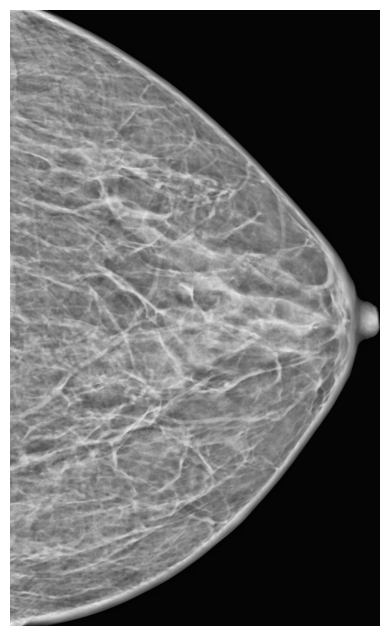

In [2]:
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

# Đường dẫn đến file ảnh
# img_path = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG/ffff43ffbe56fd959c81d83a5ecdc4dc.png'
img_path = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG-MAMMO-CLIP-CROPPED-TEXT_REMOVE-FLIP-MEDIAN-CLAHE-UNSHARP/a3d0e2394d7db36afab1b6e5e24da798.png'

# Kiểm tra xem file có tồn tại không
if Path(img_path).is_file():
    # Đọc file ảnh
    image = cv2.imread(img_path)

    # Chuyển từ BGR (mặc định của OpenCV) sang RGB để hiển thị đúng
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image_rgb.shape)

    # Hiển thị ảnh
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.axis('off')  # Ẩn trục
    plt.show()
else:
    print(f"File không tồn tại: {img_path}")


(3518, 2800, 3)


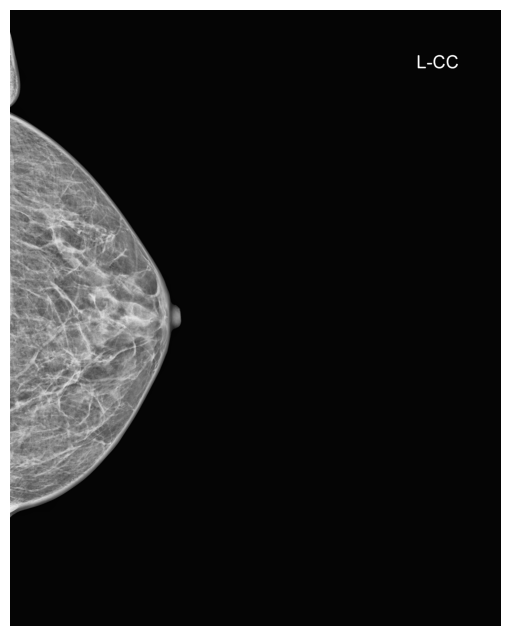

In [3]:
# import matplotlib.pyplot as plt
# import cv2
# from pathlib import Path

# # Đường dẫn đến file ảnh
# # img_path = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG/ffff43ffbe56fd959c81d83a5ecdc4dc.png'
# img_path = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG-Processed-30_sample/a3d0e2394d7db36afab1b6e5e24da798.png'

# # Kiểm tra xem file có tồn tại không
# if Path(img_path).is_file():
#     # Đọc file ảnh
#     image = cv2.imread(img_path)

#     # Chuyển từ BGR (mặc định của OpenCV) sang RGB để hiển thị đúng
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     print(image_rgb.shape)

#     # Hiển thị ảnh
#     plt.figure(figsize=(8, 8))
#     plt.imshow(image_rgb)
#     plt.axis('off')  # Ẩn trục
#     plt.show()
# else:
#     print(f"File không tồn tại: {img_path}")


(3518, 2800, 3)


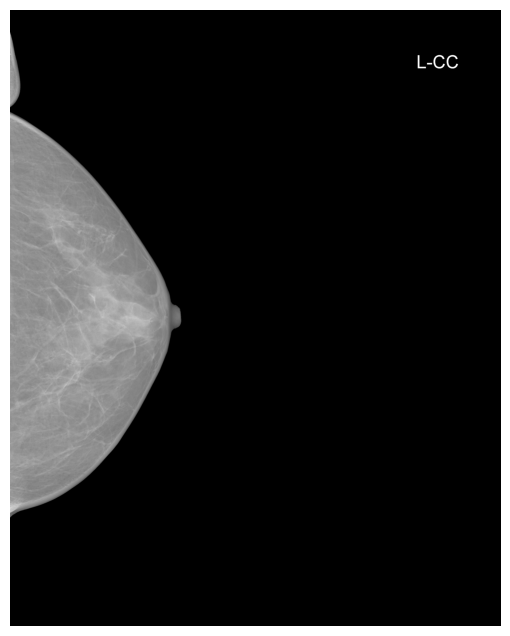

In [4]:
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

# Đường dẫn đến file ảnh
# img_path = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG/ffff43ffbe56fd959c81d83a5ecdc4dc.png'
img_path = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG/a3d0e2394d7db36afab1b6e5e24da798.png'

# Kiểm tra xem file có tồn tại không
if Path(img_path).is_file():
    # Đọc file ảnh
    image = cv2.imread(img_path)

    # Chuyển từ BGR (mặc định của OpenCV) sang RGB để hiển thị đúng
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image_rgb.shape)

    # Hiển thị ảnh
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.axis('off')  # Ẩn trục
    plt.show()
else:
    print(f"File không tồn tại: {img_path}")


(1520, 912, 3)


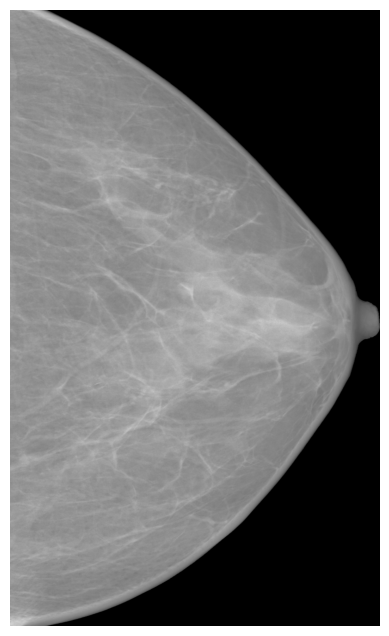

In [1]:
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

# Đường dẫn đến file ảnh
# img_path = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG/ffff43ffbe56fd959c81d83a5ecdc4dc.png'
img_path = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG-MAMMO-CLIP-CROPPED-TEXT_REMOVE/a3d0e2394d7db36afab1b6e5e24da798.png'

# Kiểm tra xem file có tồn tại không
if Path(img_path).is_file():
    # Đọc file ảnh
    image = cv2.imread(img_path)

    # Chuyển từ BGR (mặc định của OpenCV) sang RGB để hiển thị đúng
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image_rgb.shape)

    # Hiển thị ảnh
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.axis('off')  # Ẩn trục
    plt.show()
else:
    print(f"File không tồn tại: {img_path}")


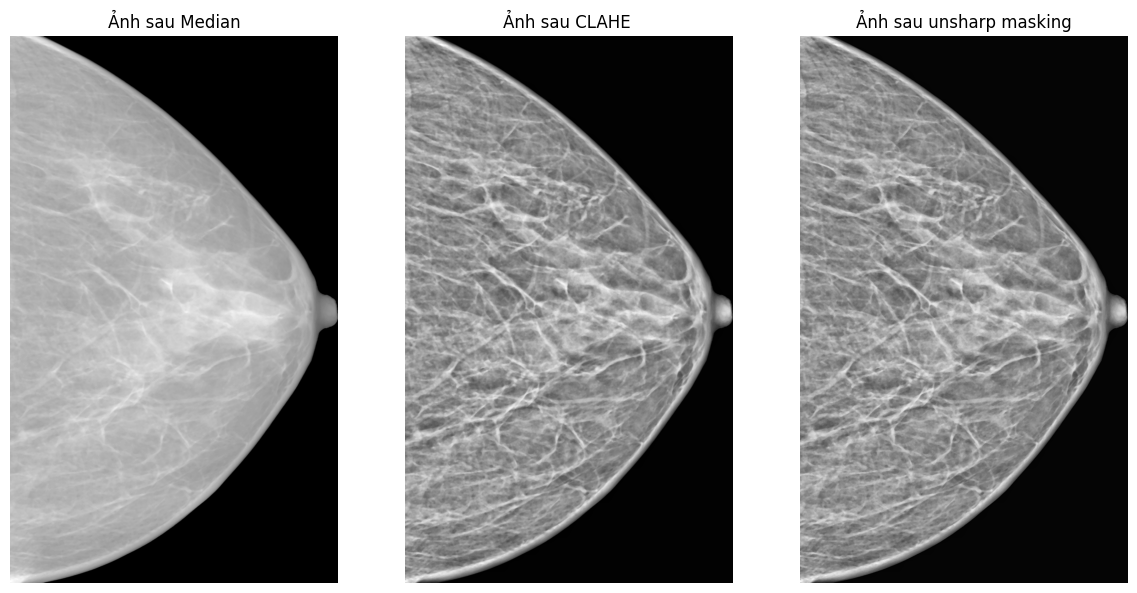

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

   # Thay đổi đường dẫn tới ảnh của bạn
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

#   Áp dụng Median Filter
median_filtered_image = cv2.medianBlur(image, 5)

#   Áp dụng CLAHE
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(32, 32))
clahe_image = clahe.apply(median_filtered_image)

 

#   Áp dụng Unsharp Masking
# Tạo bộ lọc Gaussian
gaussian_blur = cv2.GaussianBlur(clahe_image, (5, 5), 0)

# Kết hợp ảnh để làm sắc nét
unsharp_masked_image = cv2.addWeighted(clahe_image, 1.5, gaussian_blur, -0.5, 0)

# Hiển thị các ảnh
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Ảnh sau Median')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title('Ảnh sau CLAHE ')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(unsharp_masked_image, cmap='gray')
plt.title('Ảnh sau unsharp masking')
plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
# Lưu ảnh sau mỗi bước xử lý
out = '/media/mountHDD2/chuyenmt/BrEaST/Mammo/extract_to_paper'
cv2.imwrite(out+ "median_filtered_image.jpg", median_filtered_image)
cv2.imwrite(out + "clahe_image.jpg", clahe_image)
cv2.imwrite(out + "unsharp_masked_image.jpg", unsharp_masked_image)

True

In [ ]:
# import pandas as pd
# import os
# import cv2
# from PIL import Image

# # Đường dẫn đến file CSV và các thư mục ảnh
# csv_path = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo/breast-level_annotations.csv'
# image_folder = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG'
# flipped_folder = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG-Flipped'
# processed_folder = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG-Processed'

# # Đảm bảo thư mục đích tồn tại
# os.makedirs(flipped_folder, exist_ok=True)
# os.makedirs(processed_folder, exist_ok=True)

# # Đọc file CSV
# df = pd.read_csv(csv_path)

# # Duyệt qua từng hàng trong dataframe
# for idx, row in df.iterrows():
#     image_id = row['image_id']
#     laterality = row['laterality']
#     image_path = os.path.join(image_folder, f"{image_id}.png")
    
#     # Kiểm tra nếu ảnh tồn tại
#     if os.path.exists(image_path):
#         # Mở ảnh
#         image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
#         # Lật ảnh nếu laterality là 'R'
#         if laterality == 'R':
#             image = cv2.flip(image, 1)
        
#         # Áp dụng bộ lọc trung bình (Median Filter)
#         median_filtered_image = cv2.medianBlur(image, 5)

#         # Áp dụng CLAHE
#         clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(32, 32))
#         clahe_image = clahe.apply(median_filtered_image)

#         # Áp dụng Unsharp Masking
#         gaussian_blur = cv2.GaussianBlur(clahe_image, (5, 5), 0)
#         unsharp_masked_image = cv2.addWeighted(clahe_image, 1.5, gaussian_blur, -0.5, 0)

#         # Lưu ảnh đã qua tiền xử lý vào thư mục đích
#         processed_image_path = os.path.join(processed_folder, f"{image_id}.png")
#         cv2.imwrite(processed_image_path, unsharp_masked_image)


In [8]:
# # FLIP
# import pandas as pd
# import os
# from PIL import Image

# # Đường dẫn đến file CSV và các thư mục ảnh
# csv_path = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo/breast-level_annotations.csv'
# image_folder = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG'
# flipped_folder = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG-Flipped'

# # Đảm bảo thư mục đích tồn tại
# os.makedirs(flipped_folder, exist_ok=True)

# # Đọc file CSV
# df = pd.read_csv(csv_path)

# # Duyệt qua từng hàng trong dataframe
# for idx, row in df.iterrows():
#     image_id = row['image_id']
#     laterality = row['laterality']
#     image_path = os.path.join(image_folder, f"{image_id}.png")
    
#     # Kiểm tra nếu ảnh tồn tại và laterality là "R"
#     if os.path.exists(image_path) and laterality == 'R':
#         # Mở ảnh và lật ảnh
#         image = Image.open(image_path)
#         flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
        
#         # Lưu ảnh đã lật
#         flipped_image.save(os.path.join(flipped_folder, f"{image_id}.png"))
#     elif os.path.exists(image_path) and laterality == 'L':
#         # Copy ảnh không cần lật sang thư mục đích
#         image = Image.open(image_path)
#         image.save(os.path.join(flipped_folder, f"{image_id}.png"))
